In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Figure size 1000x600 with 0 Axes>

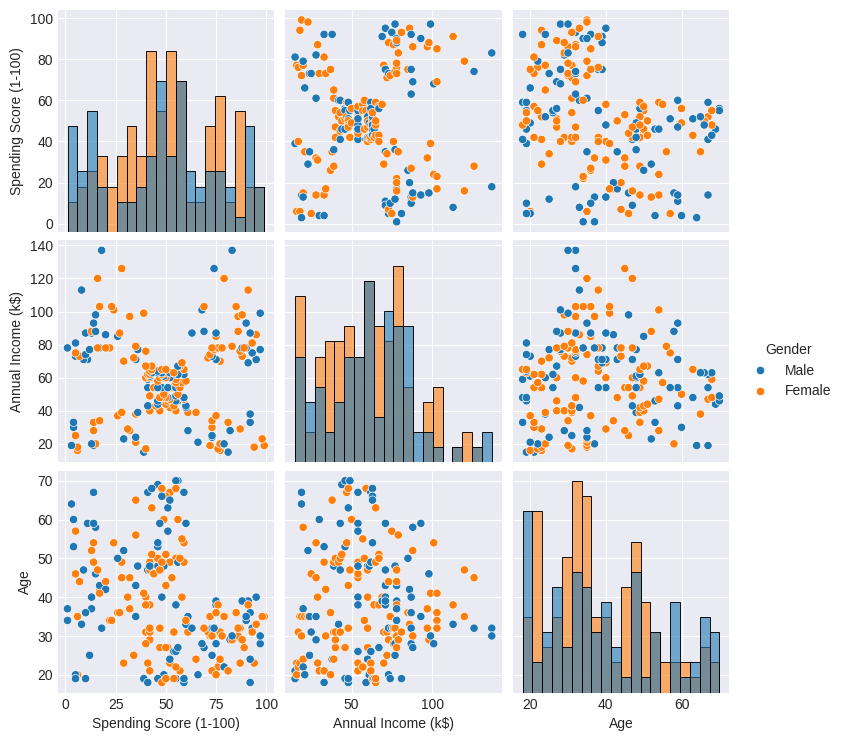

In [ ]:
plt.style.use('seaborn-darkgrid')  #Plot Style
plt.figure(figsize=(10, 6))  #Figure size

sns.pairplot(data = df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'],hue = 'Gender', diag_kind = 'hist', diag_kws={'bins': 20, 'alpha':0.6})

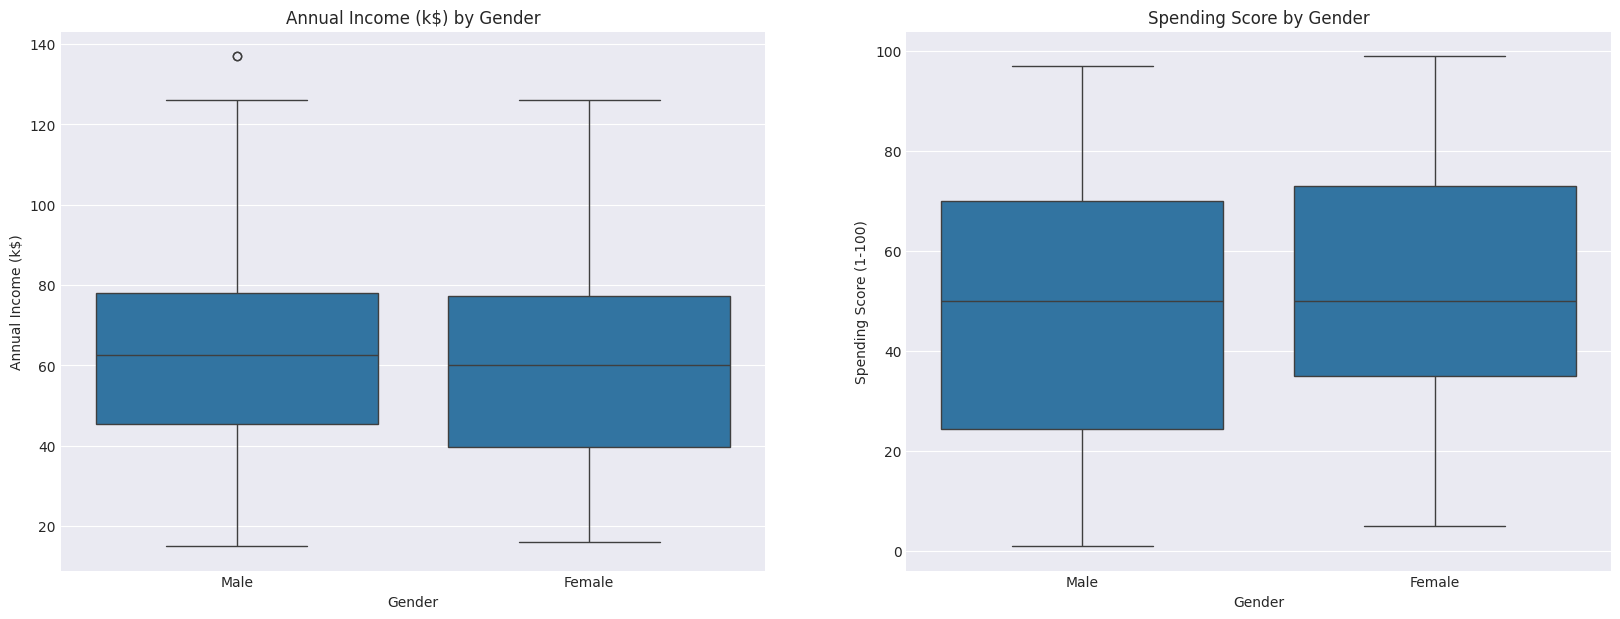

In [ ]:
# Set style
fig, ax = plt.subplots(figsize=(20, 7), nrows=1, ncols=2)
sns.set_style("whitegrid")

# Create boxplot
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', orient='v', ax = ax[0])
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', orient='v', ax = ax[1])

# Set labels
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Annual Income (k$)')
ax[0].set_title('Annual Income (k$) by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Spending Score (1-100)')
ax[1].set_title('Spending Score by Gender')

# Show plot
plt.show()


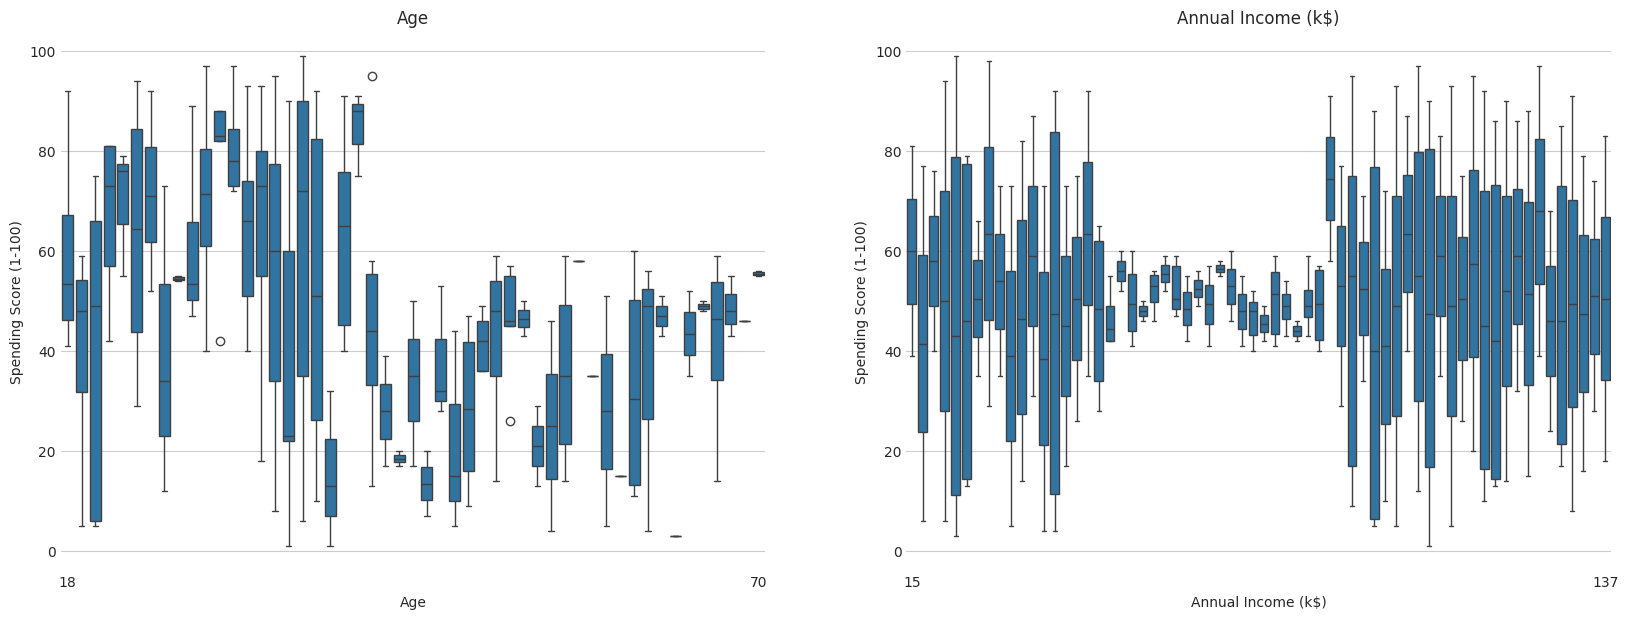

In [ ]:
# Set style
fig, ax = plt.subplots(figsize=(20, 7), nrows=1, ncols=2)
sns.set_style("whitegrid")

# Create boxplot
sns.boxplot(data=df, x='Age', y='Spending Score (1-100)', orient='v', ax=ax[0])
sns.boxplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', orient='v', ax=ax[1])

# Set labels
ax[0].set_ylabel('Spending Score (1-100)')
ax[0].set_title('Age')
ax[1].set_title('Annual Income (k$)')

#To imporve the number of x tick labels
first_tick0 = ax[0].get_xticks()[0]
last_tick0 =  ax[0].get_xticks()[-1]
first_tick1 = ax[1].get_xticks()[0]
last_tick1 =  ax[1].get_xticks()[-1]

# Adjust x-axis ticks for the Age plot
ax[0].set_xticks(ticks=[first_tick0, last_tick0], labels = [df['Age'].min(), df['Age'].max()])
ax[1].set_xticks(ticks=[first_tick1, last_tick1], labels = [df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()])
# Show plot
plt.show()


In [ ]:
df1 = df.drop(labels = ['CustomerID','Gender'], axis = 1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
inertia_list = []
n_clusters = range(1,11)
for i in range(1,11):
    num_clusters = i
    model  = KMeans(n_clusters  = num_clusters)
    model.fit(df1)
    inertia = model.inertia_
    inertia_list.append(inertia)

df_decission_clusters = pd.DataFrame({'N Clusters': n_clusters, 'Inertia' : inertia_list})

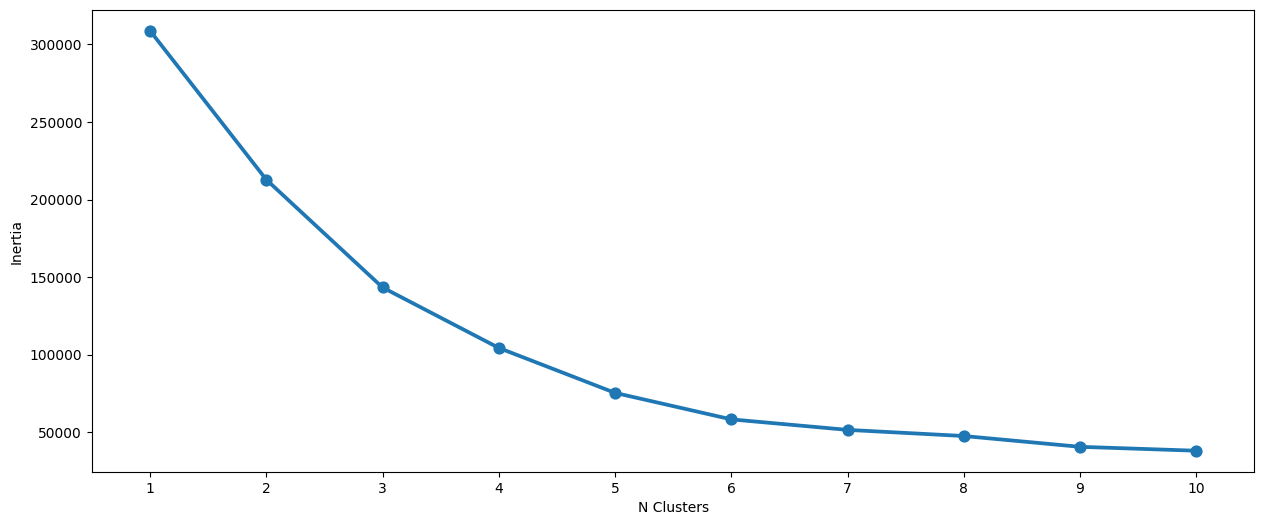

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 6))
sns.pointplot(data=df_decission_clusters, x='N Clusters', y='Inertia', ax=ax)
plt.show()

In [ ]:
#Building the model
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
model.fit(df1)

KMeans(n_clusters=5)

In [ ]:
labels1 = model.predict(df1)
print(labels1)
print(len(labels1))

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
200


In [ ]:
#Obtain the centroids
centroids = model.cluster_centers_
centroids

array([[25.52173913, 26.30434783, 78.56521739],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348]])

In [ ]:
df['Cluster Group'] = labels1
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [ ]:
import plotly as py
import plotly.graph_objs as go

KMeansDistrbution = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['Cluster Group'],
        size= 10,
        line=dict(
            color= df['Cluster Group'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [KMeansDistrbution]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
